<img src="logo-UM.jpg">

# Taller. Adquisición y adecuación de base de datos

#### Estudiante: Rafael Romario Roncancio Vinchery

#### Docente: Claudia Marcela Ospina Mosquera

#### Asignatura: Machine Learning NRC-878

#### Corporación universitaria minuto de Dios

#### Chiquinquirá, 2024



# Dataset Adult

## Dataset Information

Es un Dataset creado por Barry Becker en el cual extrajo realizó la extracción del la base de datos del censo de 1994. Se limpio la data pero aún cuenta con déficit en ella. Algunas de las condiciones de limpieza fueron: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

La data se recolectó en su momento para determinar si una persona gana más de 50.000 al año.

## Tabla de Variables

<img src="vars_table.png">

Fuente: Adaptado de [UC Irvine Machine Learning Repository], disponible en https://archive.ics.uci.edu/dataset/2/adult

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#path de mi set de datos
file_path = "./adult.data"
nRowsRead = None
#encabezado de mis datos el header de mi tabla
COLUMNS = (
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
    'occupation', 'relationship', 'race', 'sex', 
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income')


#Objeto dataset que cargara mis datos, 
#primer parametro recibe el archivo a trabajar
# delimiter=',' para que verifique la separación de los datos por ese simbolo la coma
#nrwos
#names=COLUMNS determino como se llamara cada una de las columnas para poder identificar
#encoding = "ISO-8859-1" lo uso en caso de caracteres especiales
file_data = pd.read_csv(file_path, delimiter=',', nrows=nRowsRead, names=COLUMNS, encoding = "ISO-8859-1")

file_data.head(12)



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Data cleaning

## 1. Búsqueda de datos faltantes

In [2]:
# Evaluación del tipo de variables por atributo (Variables categóricas y númericas)
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Comprobando cantidad de datos faltantes (missing) en las variables

In [3]:
# Se contabilizan y muestran el número de datos pérdidos (nulos) para cada variable del Dataset
file_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

No existen datos en faltantes en null.


## 2. Columnas Irrelevantes

Todas las columnas pueden ser relevantes para análisis futuros, no existen constantes.

## 3. Filas Repetidas

In [4]:
print(f'tamaño de dataset antes de eliminar duplicados: {file_data.shape}')
file_data.drop_duplicates(inplace=True)
print(f'tamaño de dataset despues de eliminar duplicados: {file_data.shape}')

tamaño de dataset antes de eliminar duplicados: (32561, 15)
tamaño de dataset despues de eliminar duplicados: (32537, 15)


## 4. Outliers

### 4.1 Outliers tipo String

### Variable workclass

In [5]:
print(f'tamaño de dataset antes de eliminar workclass == ?: {file_data.shape}')
file_data = file_data[~file_data['workclass'].str.contains('\?')]
print(f'tamaño de dataset despues de eliminar workclass == ?: {file_data.shape}')

tamaño de dataset antes de eliminar workclass == ?: (32537, 15)
tamaño de dataset despues de eliminar workclass == ?: (30701, 15)


### Variable ocupation

In [6]:
print(f'tamaño de dataset antes de eliminar occupation == ?: {file_data.shape}')
file_data = file_data[~file_data['occupation'].str.contains('\?')]
print(f'tamaño de dataset despues de eliminar occupation == ?: {file_data.shape}')

tamaño de dataset antes de eliminar occupation == ?: (30701, 15)
tamaño de dataset despues de eliminar occupation == ?: (30694, 15)


### Variable "native-country"

In [7]:
print(f'tamaño de dataset antes de eliminar country == ?: {file_data.shape}')
#file_data = file_data[file_data['native-country']!='?']
file_data = file_data[~file_data['native-country'].str.contains('\?')]
print(f'tamaño de dataset despues de eliminar country == ?: {file_data.shape}')

tamaño de dataset antes de eliminar country == ?: (30694, 15)
tamaño de dataset despues de eliminar country == ?: (30139, 15)


Se encuentran valores en varias columnas con el valor ?, valor que en la tabla de variables no es una opción por ende debe tomarse como un valor faltante.

Columna: estado civil - marital-status data = [ "never-married", "married-civ-spouse", "divorced", "married-spouse-absent", "separated", "married-af-spouse" "widowed" ]

en español es datos : "nunca casado": 0, "cónyuge-civil-casado": 1, "divorciado": 2, "cónyuge-casado-ausente": 3, "separados": 4, "casado-de-cónyuge": 5, "viudo": 6 }

esos datos tienen que estar separados no es posible unificar debido a que el término estado civil encierra todos estos, inclusive en otros países existe la unión de hecho como por ejemplo en Colombia
    

### 4.2 Outliers numericos

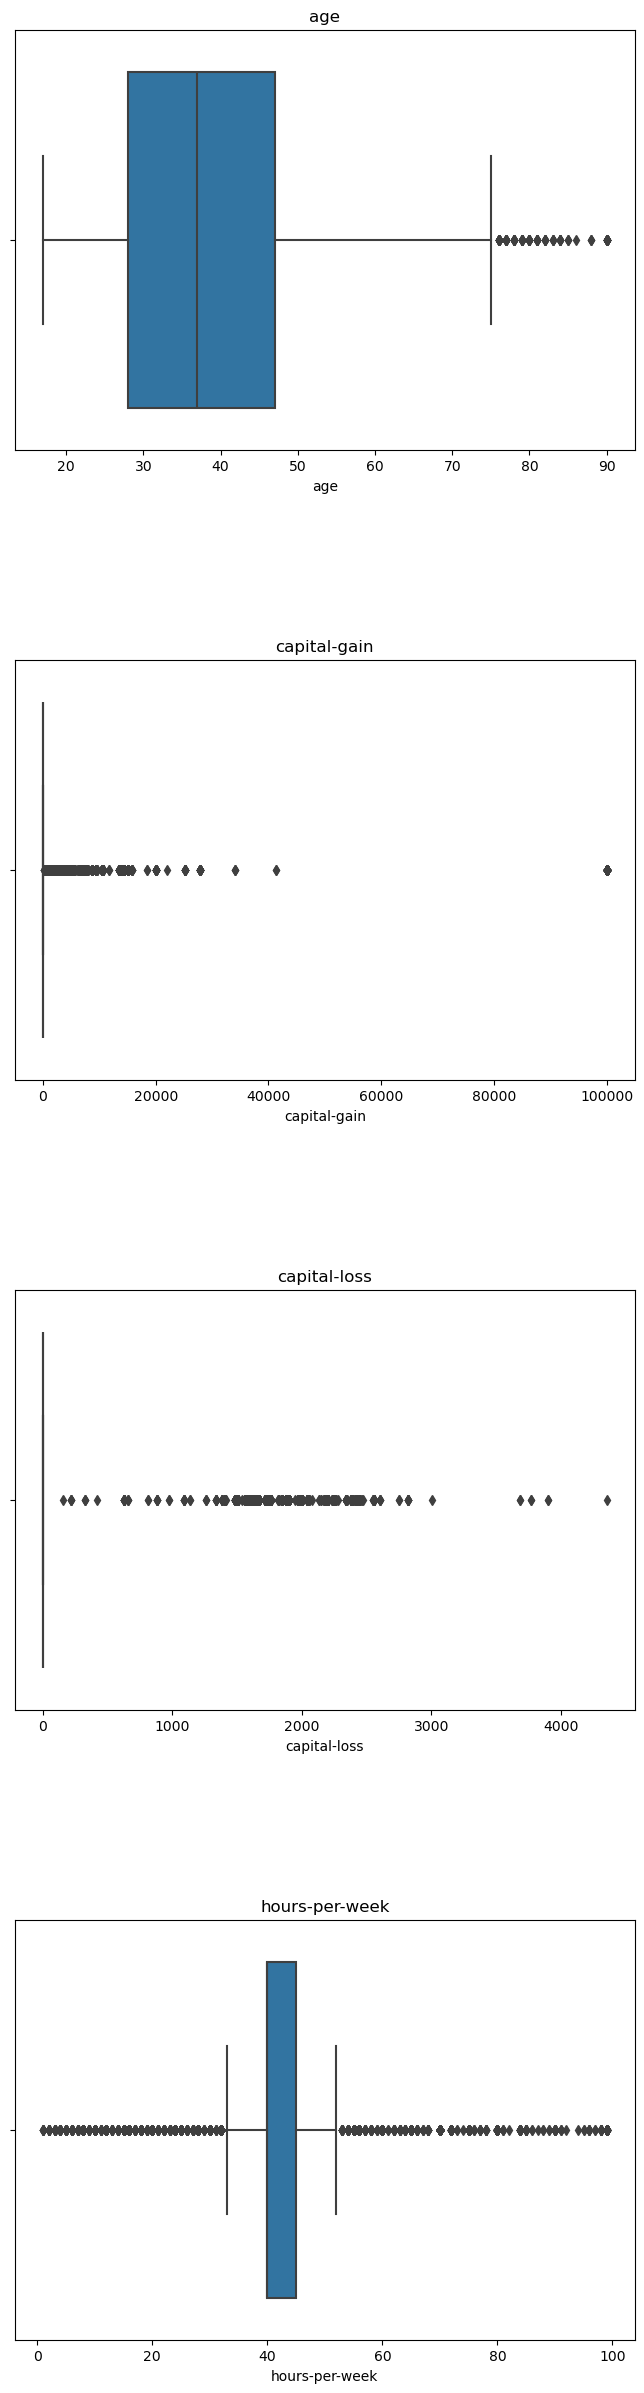

In [8]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes

cols_num = ('age', 'capital-gain', 'capital-loss', 'hours-per-week')

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=file_data, ax=ax[i])
    ax[i].set_title(col)

No se encontraron datos outliers con valores numericos

## 5 Errores tipográficos en variables categóricas

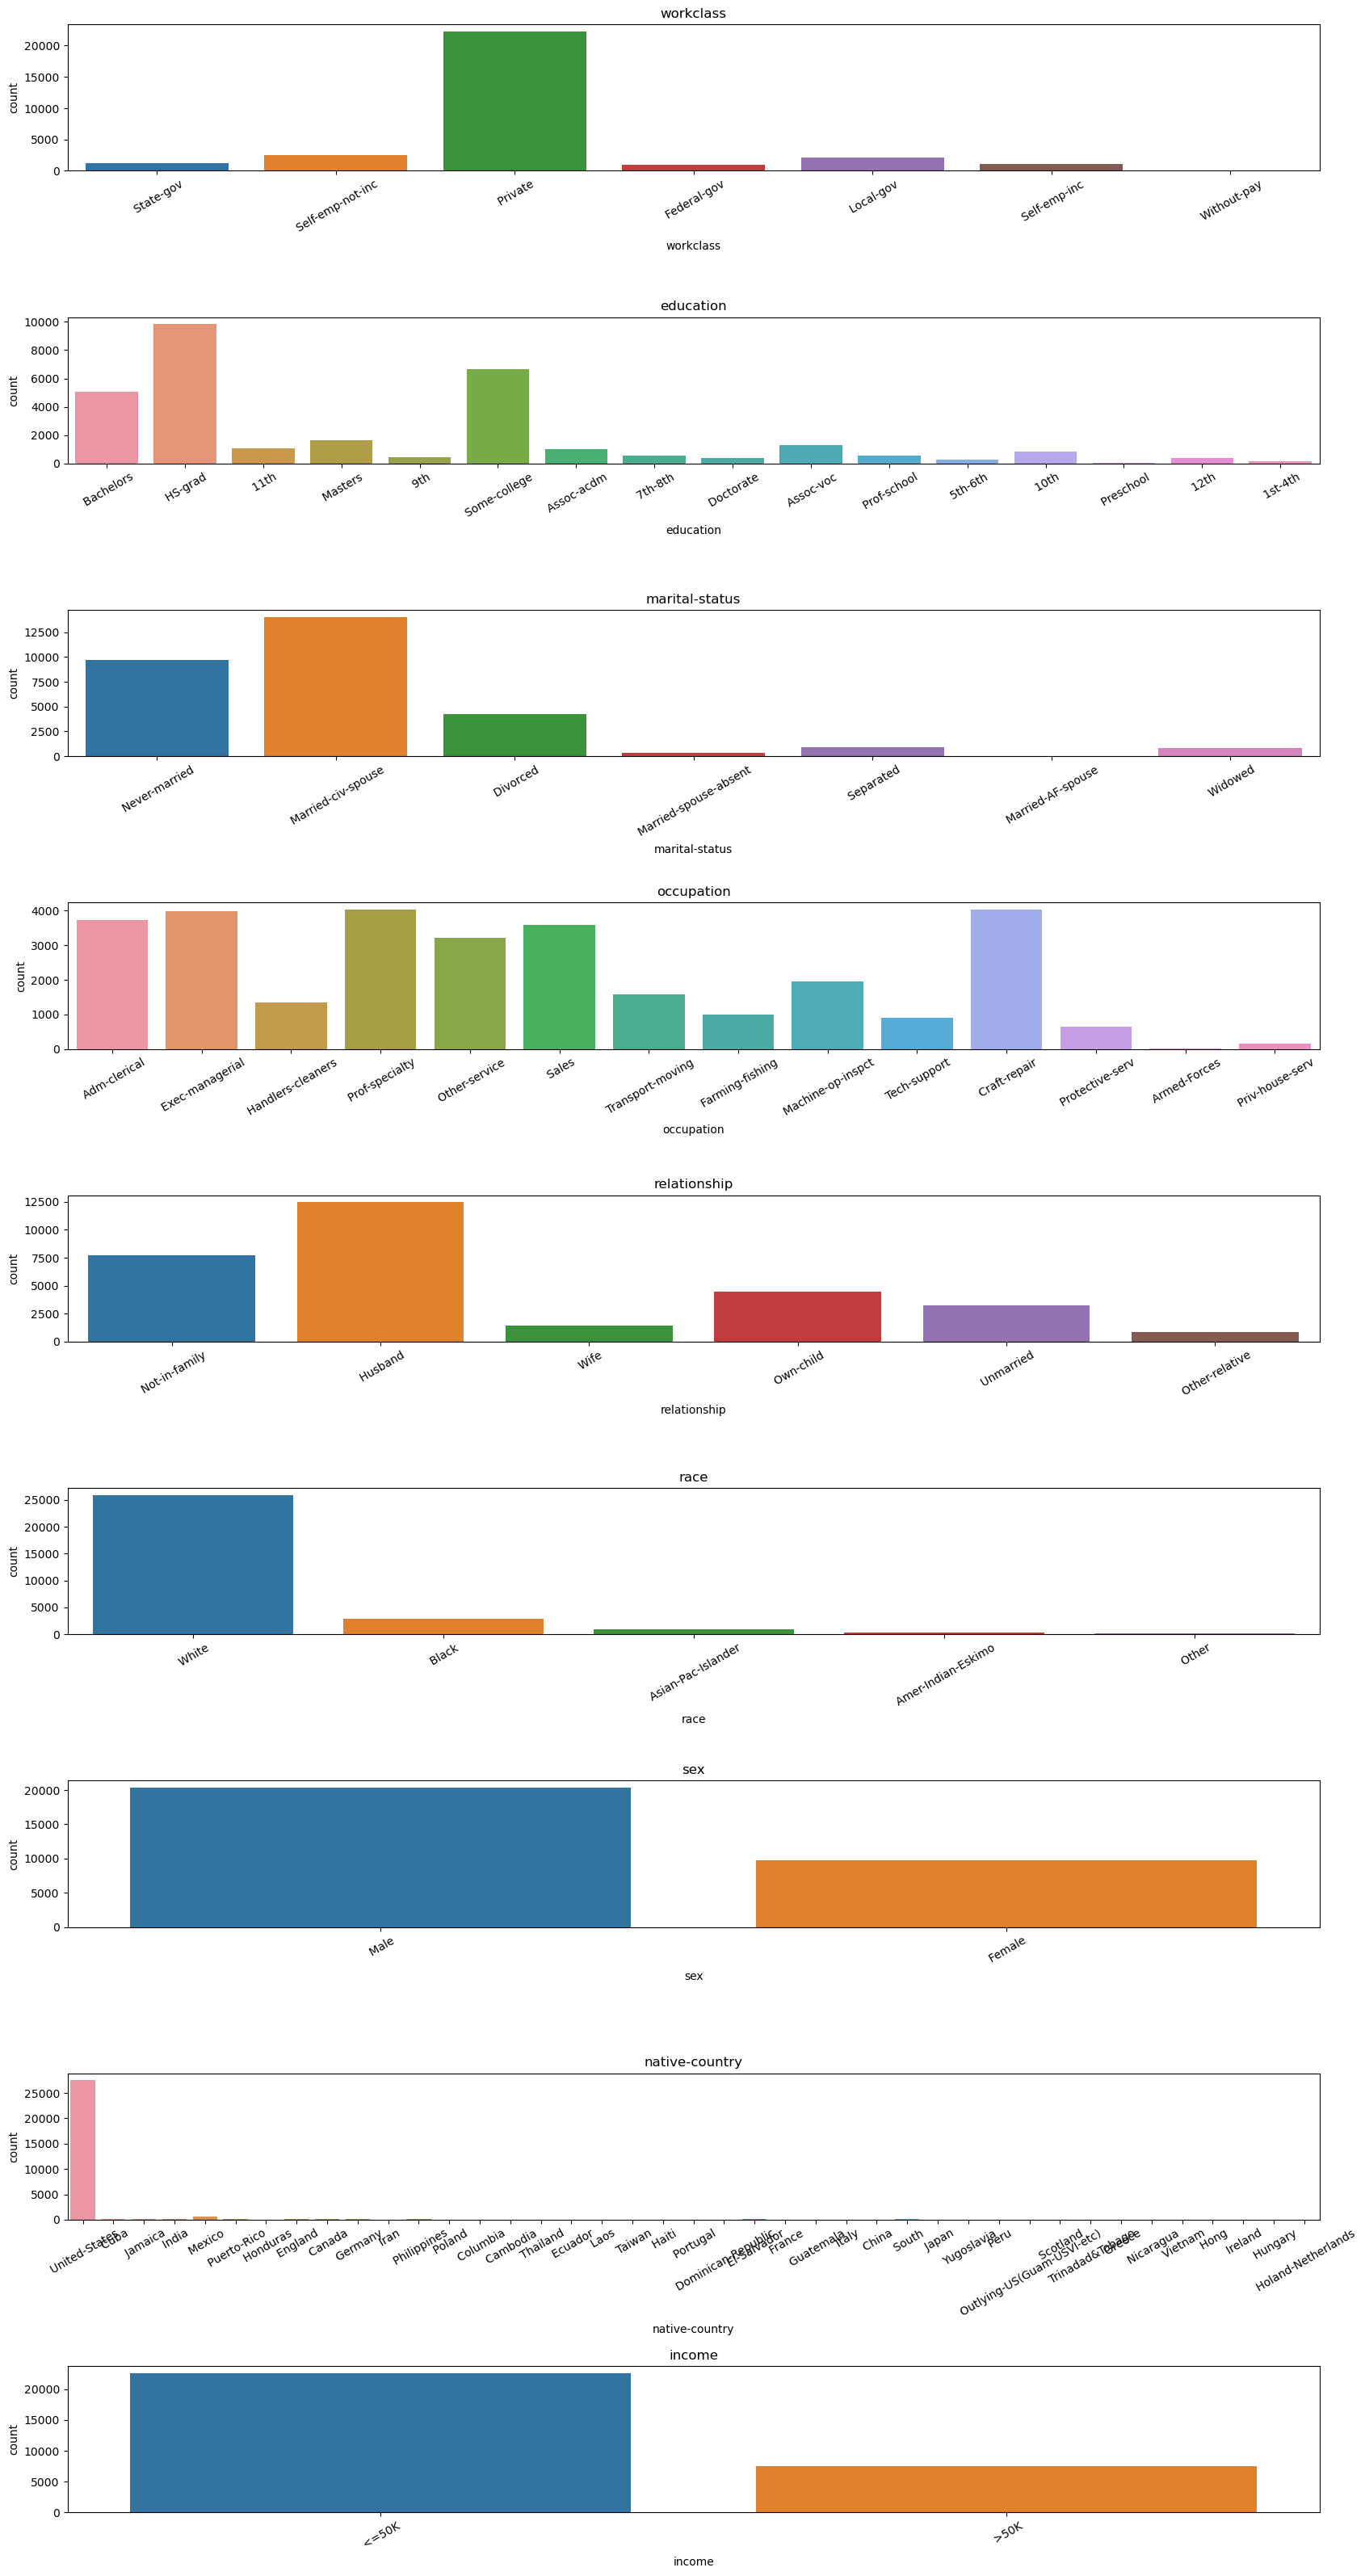

In [9]:
COLUMNS = (
    'workclass', 'education', 'marital-status', 
    'occupation', 'relationship', 'race', 'sex',
    'native-country', 'income')

fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(20,40))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(COLUMNS):
    sns.countplot(x=col, data=file_data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

#### Error u observación:

Se encontró una observación muchas valores tenían espacios en el inicio y final de los contenidos, los espacios en inicio o final son realmente irrelevantes por lo que se deben borrar para cuando se haga el proceso de variables de tendencia central para valores categóricas es necesario


In [10]:
COLUMNS = (
    'workclass', 'education', 'marital-status', 
    'occupation', 'relationship', 'race', 'sex',
    'native-country', 'income')
print(f'Tamaño de dataset antes de modificar: {file_data.shape}')
for column in COLUMNS:
    # Imprime el tamaño del DataFrame antes de realizar cambios
    #print(f'Tamaño de dataset antes de modificar native-country: {file_data.shape}')
    file_data[column] = file_data[column].str.strip().str.lower()
    #print(f'Tamaño de dataset después de modificar native-country: {file_data.shape}')
print(f'Tamaño de dataset despues de modificar: {file_data.shape}')

Tamaño de dataset antes de modificar: (30139, 15)
Tamaño de dataset despues de modificar: (30139, 15)


# Analisis de medidas de tendencia central

## Objetivos

### Designar variable categorica

In [11]:


COLUMNS = (
    'workclass', 'education', 'marital-status', 
    'occupation', 'relationship', 'race', 'sex',
    'native-country', 'income')

convention_column_dict = {}
for column in COLUMNS:
    attr_unique_list = file_data[column].unique().tolist()
    aux_convention_dict = {}
    for index, value in enumerate(attr_unique_list):
        aux_convention_dict[value] = index
    convention_column_dict[column] = aux_convention_dict

print("CONVENCIONES") 
for column in COLUMNS:
    print(f'\nColumn: {column}')
    __json_data = json.dumps(convention_column_dict[column], indent=4)
    print(f'data:{__json_data}')

CONVENCIONES

Column: workclass
data:{
    "state-gov": 0,
    "self-emp-not-inc": 1,
    "private": 2,
    "federal-gov": 3,
    "local-gov": 4,
    "self-emp-inc": 5,
    "without-pay": 6
}

Column: education
data:{
    "bachelors": 0,
    "hs-grad": 1,
    "11th": 2,
    "masters": 3,
    "9th": 4,
    "some-college": 5,
    "assoc-acdm": 6,
    "7th-8th": 7,
    "doctorate": 8,
    "assoc-voc": 9,
    "prof-school": 10,
    "5th-6th": 11,
    "10th": 12,
    "preschool": 13,
    "12th": 14,
    "1st-4th": 15
}

Column: marital-status
data:{
    "never-married": 0,
    "married-civ-spouse": 1,
    "divorced": 2,
    "married-spouse-absent": 3,
    "separated": 4,
    "married-af-spouse": 5,
    "widowed": 6
}

Column: occupation
data:{
    "adm-clerical": 0,
    "exec-managerial": 1,
    "handlers-cleaners": 2,
    "prof-specialty": 3,
    "other-service": 4,
    "sales": 5,
    "transport-moving": 6,
    "farming-fishing": 7,
    "machine-op-inspct": 8,
    "tech-support": 9,
    "

### Agregar variable categorica en tabla

In [12]:
for column in COLUMNS:
    __aux_dict = convention_column_dict[column]
    file_data[f'convention_{column}'] = file_data[column].map(__aux_dict)

print(file_data)

       age         workclass  fnlwgt   education  education-num  \
0       39         state-gov   77516   bachelors             13   
1       50  self-emp-not-inc   83311   bachelors             13   
2       38           private  215646     hs-grad              9   
3       53           private  234721        11th              7   
4       28           private  338409   bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           private  257302  assoc-acdm             12   
32557   40           private  154374     hs-grad              9   
32558   58           private  151910     hs-grad              9   
32559   22           private  201490     hs-grad              9   
32560   52      self-emp-inc  287927     hs-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           never-married       adm-clerical  not-in-family  white    male   
1      married-civ-spouse    exec-manag

### Creación de archivo nuevo

In [13]:
file_data.to_csv('./Adult_DP.csv')

In [14]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split



file_clean_path = "./Adult_DP.csv"
nRowsRead = None
file_clean_data = pd.read_csv(file_clean_path, delimiter=',', nrows=nRowsRead, encoding = "ISO-8859-1")

#print(file_clean_data["marital-status"])
unique_relationships = file_clean_data['relationship'].unique()

print(unique_relationships)
print(file_clean_data.info())
#file_data.head(12)

#print(file_clean_data.target_names)



['not-in-family' 'husband' 'wife' 'own-child' 'unmarried' 'other-relative']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30139 entries, 0 to 30138
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 30139 non-null  int64 
 1   age                        30139 non-null  int64 
 2   workclass                  30139 non-null  object
 3   fnlwgt                     30139 non-null  int64 
 4   education                  30139 non-null  object
 5   education-num              30139 non-null  int64 
 6   marital-status             30139 non-null  object
 7   occupation                 30139 non-null  object
 8   relationship               30139 non-null  object
 9   race                       30139 non-null  object
 10  sex                        30139 non-null  object
 11  capital-gain               30139 non-null  int64 
 12  capital-loss               30139 non-nul

### Alistar tabla con solo datos numericos

In [15]:
columns_to_drop = ['Unnamed: 0','workclass', 'education', 'marital-status', 
    'occupation', 'relationship', 'race', 'sex', 
    'native-country', 'income',
    'capital-gain', 'capital-loss', 'convention_workclass', 'convention_education',
    'convention_marital-status', 'convention_occupation', 'convention_relationship',
    'convention_race', 'convention_sex', 'convention_native-country', 'fnlwgt'
    ]
X_only_conventions = file_clean_data.drop(columns_to_drop, axis=1)  # Features
X_only_conventions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30139 entries, 0 to 30138
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                30139 non-null  int64
 1   education-num      30139 non-null  int64
 2   hours-per-week     30139 non-null  int64
 3   convention_income  30139 non-null  int64
dtypes: int64(4)
memory usage: 942.0 KB


In [16]:
#X = file_clean_data.drop('convention_income', axis=1)  # Features
#X = file_clean_data.drop('workclass', axis=1)  # Features
#X = file_clean_data.drop('education', axis=1)  # Features


y = file_clean_data['convention_income']  # Target variable


Xtrain, Xtest, ytrain, ytest = train_test_split(
    X_only_conventions.values, 
    y, 
    random_state=8,
    stratify=y
)

X_test=pd.DataFrame({
    'age':Xtest[:,0],
    'education-num':Xtest[:,1],
    #'capital-gain':Xtest[:,1],
    #'capital-loss':Xtest[:,4],
    'hours-per-week':Xtest[:,2],
    #'convention_workclass':Xtest[:,6],
    #'convention_education':Xtest[:,7],
    #'convention_marital-status':Xtest[:,8],
    #'convention_occupation':Xtest[:,9],
    #'convention_relationship':Xtest[:,10],
    #'convention_race':Xtest[:,11],
    #'convention_sex':Xtest[:,12],
    #'convention_native-country':Xtest[:,13],
    'income': ytest 
})

X_train=pd.DataFrame({
    'age':Xtrain[:,0],
    'education-num':Xtrain[:,1],
    #'capital-gain':Xtrain[:,3],
    #'capital-loss':Xtrain[:,4],
    'hours-per-week':Xtrain[:,2],
    #'convention_workclass':Xtrain[:,6],
    #'convention_education':Xtrain[:,7],
    #'convention_marital-status':Xtrain[:,8],
    #'convention_occupation':Xtrain[:,9],
    #'convention_relationship':Xtrain[:,10],
    #'convention_race':Xtrain[:,11],
    #'convention_sex':Xtrain[:,12],
    #'convention_native-country':Xtrain[:,13],
    'income': ytrain 
})

#X_test.head(20)
X_train.head(10)

,age,education-num,hours-per-week,income
466,24,13,40,0
19664,64,9,50,0
9293,23,13,40,0
7145,22,10,37,0
12579,48,9,45,0
22521,40,13,40,1
1564,24,10,40,0
24350,40,10,40,0
17452,39,13,60,1
11236,53,9,38,0


In [17]:

from sklearn.cluster import KMeans

# Se aplica el algoritmo y se encuentra los centroides de los grupos
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_train.drop(["income"], axis=1))
kmeans.cluster_centers_

array([[49.94044641, 10.32374447, 43.7891091 ],
       [28.6010647 ,  9.95700246, 38.56453726]])

In [18]:
import statistics as stat
import numpy as np

# Realizamos la predicción con los datos de prueba
y_pred = kmeans.predict(X_test.drop(["income"],axis = 1))

for i in range(0,2):

    row = np.where(y_pred==i)[0]  # Filas en y_pred que corresponden con el cluster i
    num = row.shape[0]       #  Elementos de cada cluster
    r = np.floor(num/10)    #  Numero de filas para las figuras en el plot

    print("\ncluster "+str(i))
    print(f"{num} elementos")

    templist = []
    for k in range(0, num):
        templist.append(X_test.iloc[row[k], ].income)
    
    print('Clase asociada al cluster:',stat.mode(templist))


cluster 0
3492 elementos
Clase asociada al cluster: 0

cluster 1
4043 elementos
Clase asociada al cluster: 0


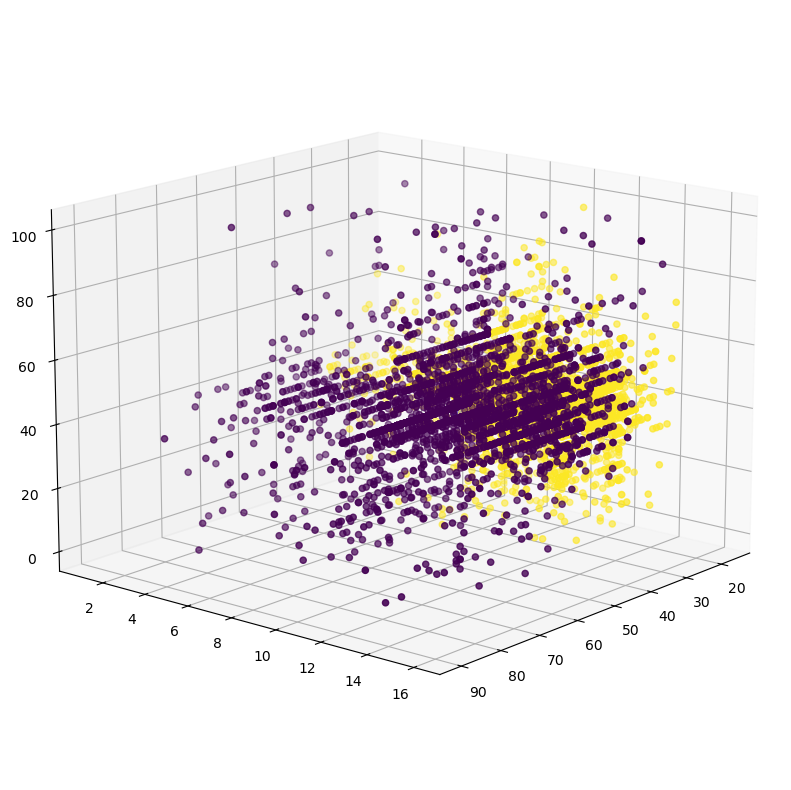

In [19]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

 
ax.view_init(15, 40)

ax.scatter(X_test['age'], X_test['education-num'],X_test['hours-per-week'],c=y_pred,cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c ='blue',s=200,alpha = 0.5)

plt.show()

/home/xue/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/xue/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/xue/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


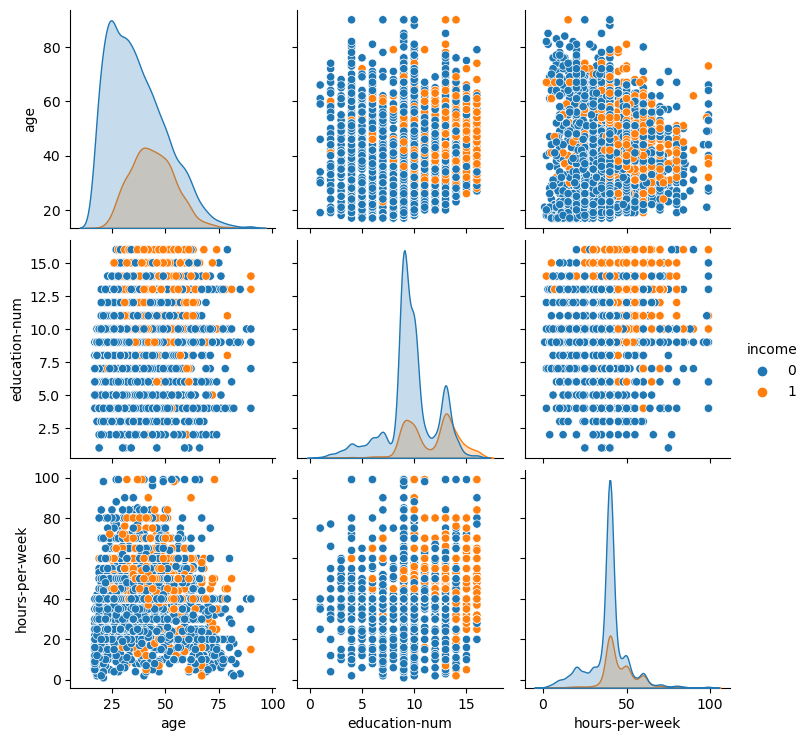

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define tu conjunto de datos (reemplaza esto con tus datos reales)
data = pd.DataFrame({
    'age': [24, 64, 23, 22, 48, 40, 24, 40, 39, 53],
    'education-num': [13, 9, 13, 10, 9, 13, 10, 10, 13, 9],
    'hours-per-week': [40, 50, 40, 37, 45, 40, 40, 40, 60, 38],
    'income': [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
})

# Crea el gráfico de pares
sns.pairplot(X_test, hue='income', diag_kind='auto', markers='o')

# Muestra la gráfica
plt.show()

In [61]:
y_pred#[:100]

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

# Conclusiones

In [21]:
ytest#.values[:100]

25443    0
27065    0
29387    0
4739     1
20595    0
        ..
2932     0
25075    1
21013    0
8437     0
29396    1
Name: convention_income, Length: 7535, dtype: int64

# Matriz de confusión : Se usa como metrica de desempeño, compara la predicción con las salidas reales, en la diagonal principal se espera el mayor número de aciertos.

In [22]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(ytest,y_pred)
print(matriz)

[[3473 2185]
 [ 568 1309]]


1. En el data cleaning los atributos o columnas de tipo categoría muchas veces tienen en la cadena de texto datos que tiene la misma intención, se diferencian levemente con espacios, mayúsculas y minúsculas, es indispensable darles forma para poder hacer un análisis óptimo por medio los scripts que ejecutan esa data.

2. Los datos outliers son aquellos que no tiene lógica pero no se encontró ninguno que fuese imposible a pesar que la persona trabajaba más horas en la semana era de aproximadamente 100 horas calculo que nos dice que trabaja 14.28 horas diarias número que es posible. se podría alegar que legalmente es injusto o físicamente desgastante; pero para los datos es factible y por ende estará en la muestra para el análisis.

3. La mayoría de las personas en la base de datos no logra los $50.000 al año.

4. Para el análisis matemático como las medidas de tendencia central de variables cualitativas es necesario designar una variable categórica (convenciones key:str(category), value:entero).

5. En el Ejercicio de data cleaning es inevitable pensar en eliminar algunos registros pero lo más importante es el análisis y aprender cuando se debe hacer y en qué casos darle forma a los datos sin afectar el estudio que se quiere hacer con ellos.




# Referencias

pandas.pydata.org. (2024, Enero 20). pandas.api.extensions.ExtensionArray.tolist. pandas. https://pandas.pydata.org/docs/reference/api/pandas.api.extensions.ExtensionArray.tolist.html

Becker, B & Kohavi, R. (1996, Abril 30). Adult. UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/dataset/2/adult